# Project 1: Airbnb Data Anaylysis

This notebook explores and analyzes Airbnb datasets (`listings.csv`, `reviews.csv`, and `calendar.csv`). The analysis includes data exploration, cleaning, and visualization

In [1]:
#Import Necessary Libraries
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## 1. Load and Explore the Dataset

This section loads the datasets and displays basic information about them.

In [2]:
#Explore the data set
listings = pd.read_csv('listings.csv') 
reviews = pd.read_csv('reviews.csv') 
calendar = pd.read_csv('calendar.csv')
print(listings.head())
print(listings.columns) #get overview of columns in the data set
print(F"Number of rows in listings : {listings.shape[0]}")

#print(calendar.head())
print(reviews.head())
print(reviews.columns) #get overview of columns in the data set
print(F"Number of rows in reviews : {reviews.shape[0]}")

print(calendar.head())
print(calendar.columns) #get overview of columns in the data set
print(F"Number of rows in calendar : {calendar.shape[0]}")

#Display basic information about each DataFrame
print(listings.info())
print(reviews.info())
print(calendar.info())

        id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits at

## 2. Data Cleaning

This section handles missing data and cleans the datasets to prepare them for analysis.

In [3]:
def clean_airbnb_data(listings: pd.DataFrame, calendar: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    Cleans and preprocesses Airbnb listings and calendar datasets.

    This function performs the following steps:
    1. Handles missing data in the `review_scores_rating` column of the `listings` dataset by filling with the median.
    2. Cleans the `price` column in both `listings` and `calendar` datasets by removing dollar signs and commas,
       and converting to float.
    3. Handles missing data in the `price` column of the `calendar` dataset by filling with the median price.
    4. Converts categorical columns (`property_type` and `room_type`) in the `listings` dataset to the `category` type.
    5. Adds a new feature `price_per_person` to the `listings` dataset.

    Parameters:
        listings (pd.DataFrame): The Airbnb listings dataset.
        calendar (pd.DataFrame): The Airbnb calendar dataset.

    Returns:
        tuple[pd.DataFrame, pd.DataFrame]: A tuple containing the cleaned `listings` and `calendar` datasets.
    """
    # Handle missing data in listings
    listings['review_scores_rating'].fillna(listings['review_scores_rating'].median(), inplace=True)

    # Clean the price column in the calendar dataset
    calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)

    # Handle missing data in the calendar
    calendar['price'].fillna(calendar.groupby('listing_id')['price'].transform('median'), inplace=True)

    # Clean the price column in the listings dataset
    listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)

    # Encode categorical data
    listings['property_type'] = listings['property_type'].astype('category')
    listings['room_type'] = listings['room_type'].astype('category')

    # Feature engineering: Add price_per_person
    listings['price_per_person'] = listings['price'] / listings['accommodates']

    return listings, calendar


# Example usage
if __name__ == "__main__":
    # Load datasets (replace with your actual file paths)
    listings = pd.read_csv('listings.csv')
    calendar = pd.read_csv('calendar.csv')

    # Clean the data
    cleaned_listings, cleaned_calendar = clean_airbnb_data(listings, calendar)

    # Inspect the cleaned data
    print(cleaned_listings.head())
    print(cleaned_calendar.head())

<>:24: SyntaxWarning: invalid escape sequence '\$'
<>:30: SyntaxWarning: invalid escape sequence '\$'
<>:24: SyntaxWarning: invalid escape sequence '\$'
<>:30: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Craig Julius\AppData\Local\Temp\ipykernel_8720\267053261.py:24: SyntaxWarning: invalid escape sequence '\$'
  calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\Craig Julius\AppData\Local\Temp\ipykernel_8720\267053261.py:30: SyntaxWarning: invalid escape sequence '\$'
  listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\Craig Julius\AppData\Local\Temp\ipykernel_8720\267053261.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

        id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits at

C:\Users\Craig Julius\AppData\Local\Temp\ipykernel_8720\267053261.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  calendar['price'].fillna(calendar.groupby('listing_id')['price'].transform('median'), inplace=True)


## 3. Visualize Price Distribution

This section visualizes the distribution of prices in the calendar dataset using a histogram.

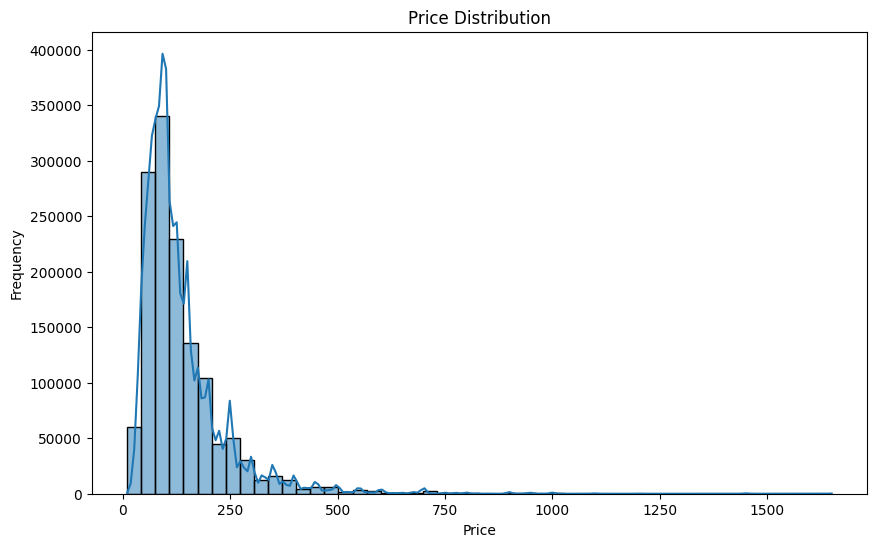

In [4]:
# Visualize price distribution
plt.figure(figsize=(10, 6))
sns.histplot(calendar['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

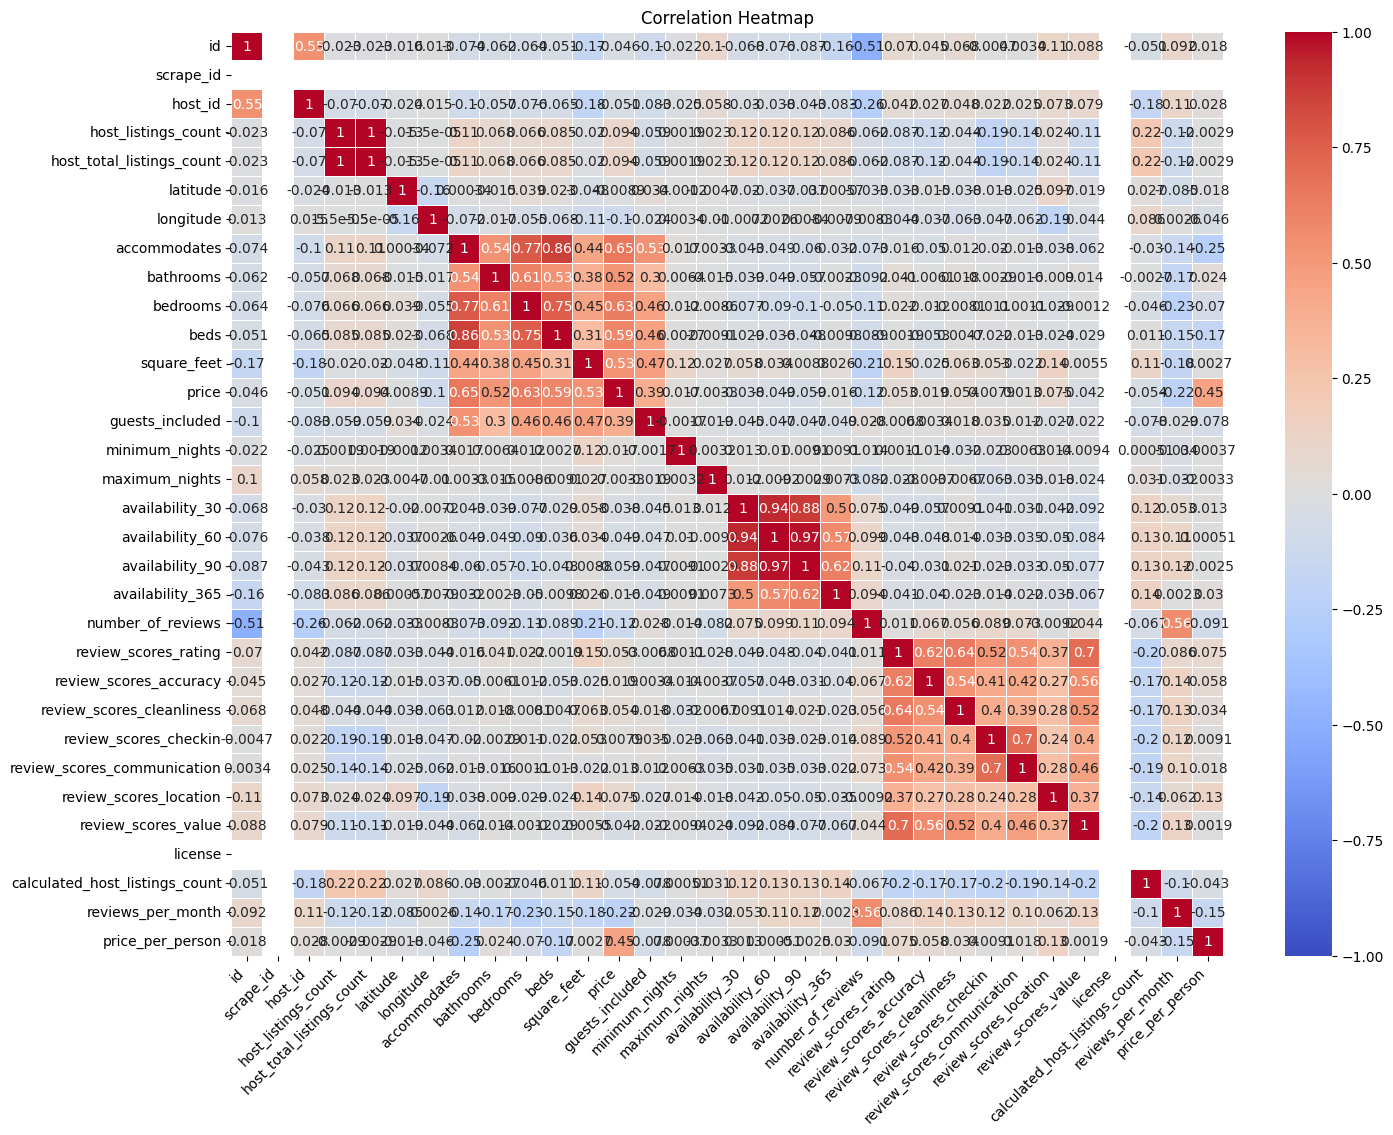

In [5]:
# Correlation heatmap for listings
plt.figure(figsize=(16, 12))  # Increased figure size
corr_matrix = listings.corr(numeric_only=True)

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Rotate x and y axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Heatmap')
plt.show()


# Question 1: Pricing Optimization

In [6]:
# Question 1: Pricing Optimization
# Price statistics
price_stats = calendar['price'].describe()
print(price_stats)

count    1.358895e+06
mean     1.353603e+02
std      1.002658e+02
min      1.000000e+01
25%      7.500000e+01
50%      1.050000e+02
75%      1.590000e+02
max      1.650000e+03
Name: price, dtype: float64


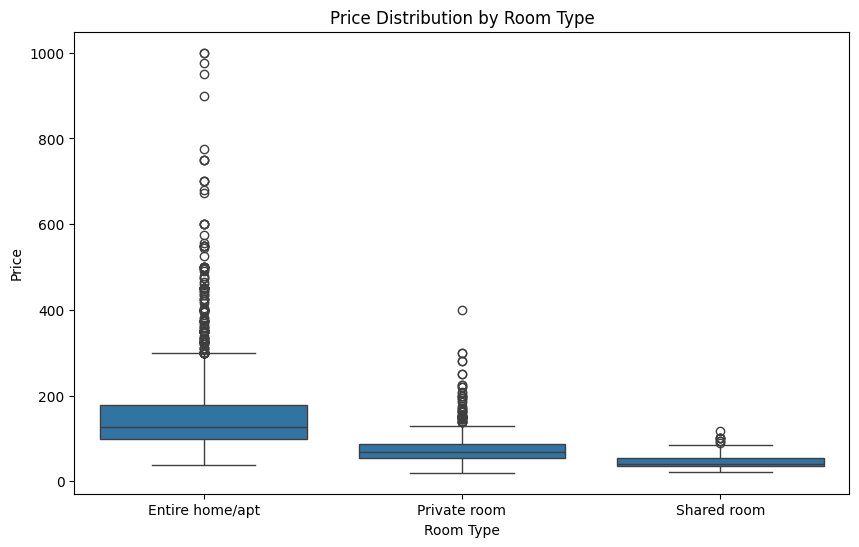

In [7]:
# Visualize price by room type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=listings)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()


In [8]:
# Occupancy analysis
calendar['date'] = pd.to_datetime(calendar['date'])
occupied_days = calendar[calendar['available'] == 'f'].groupby('listing_id').size()
print(occupied_days.describe())


count    3140.000000
mean      146.187261
std       125.484371
min         1.000000
25%        23.000000
50%       118.000000
75%       272.000000
max       365.000000
dtype: float64


# Question 2: Guest Satisfaction

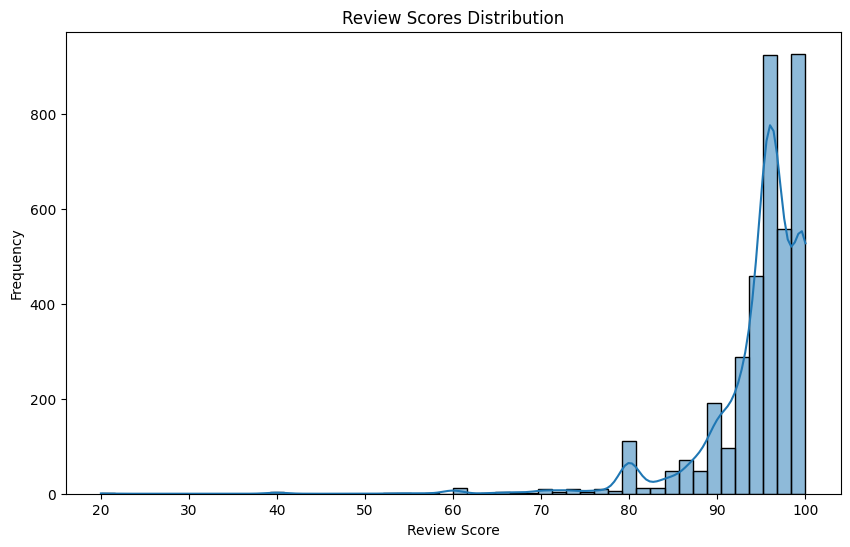

In [9]:
# Question 2: Guest Satisfaction
# Review scores distribution
plt.figure(figsize=(10, 6))
sns.histplot(listings['review_scores_rating'], bins=50, kde=True)
plt.title('Review Scores Distribution')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.show()

## Generate word cloud for reviews

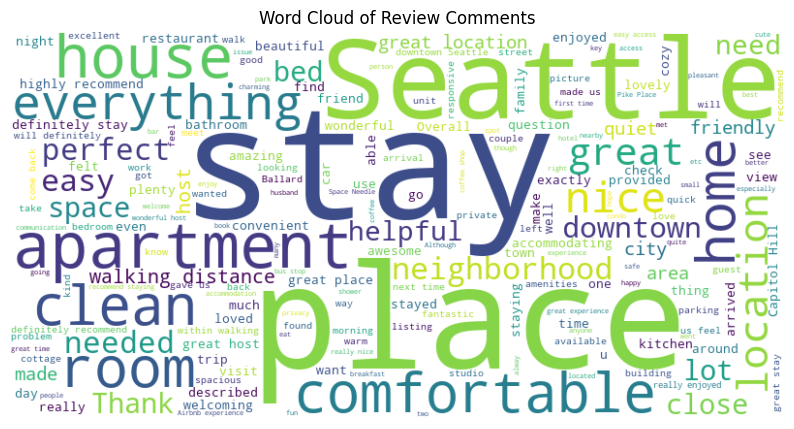

In [10]:
# Generate word cloud for reviews
all_comments = ' '.join(reviews['comments'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Comments')
plt.show()

# Question 3: Availability Trends

<Figure size 1500x700 with 0 Axes>

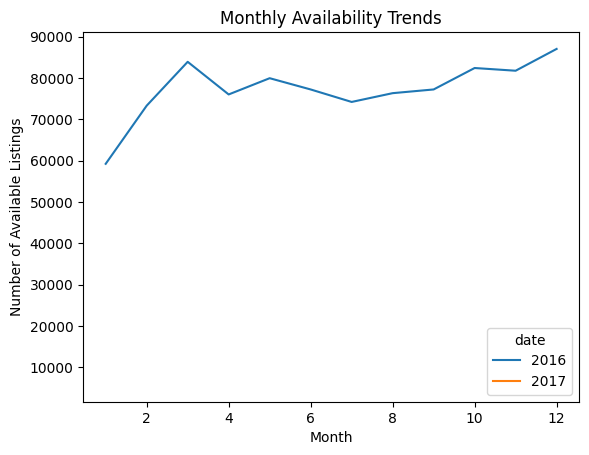

In [11]:
# Question 3: Availability Trends
# Availability trends over time
calendar['date'] = pd.to_datetime(calendar['date'])
monthly_availability = calendar.groupby([calendar['date'].dt.year, calendar['date'].dt.month])['available'].apply(lambda x: (x == 't').sum()).unstack().T

plt.figure(figsize=(15, 7))
monthly_availability.plot(kind='line')
plt.title('Monthly Availability Trends')
plt.xlabel('Month')
plt.ylabel('Number of Available Listings')
plt.show()

C:\Users\Craig Julius\AppData\Local\Temp\ipykernel_8720\206776710.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='available', data=seasonal_availability, palette='coolwarm')


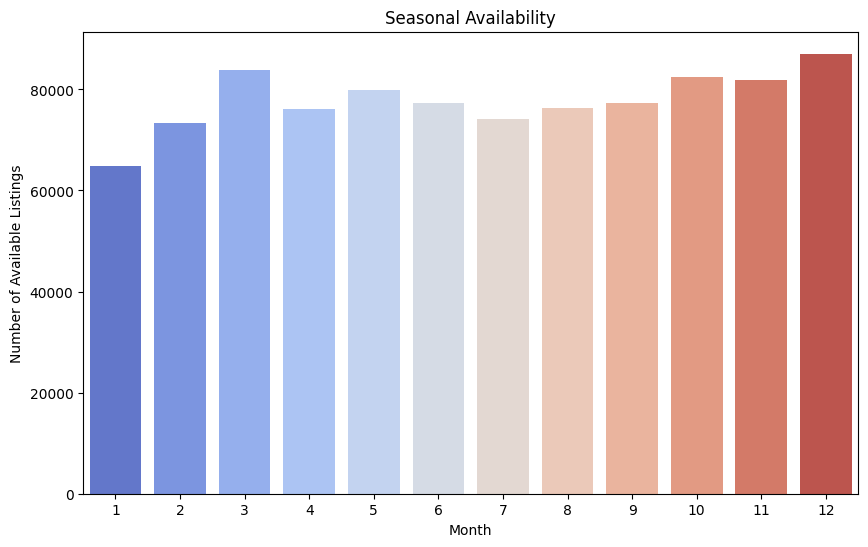

In [12]:
# Seasonal analysis
calendar['month'] = calendar['date'].dt.month
seasonal_availability = calendar.groupby('month')['available'].apply(lambda x: (x == 't').sum()).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='available', data=seasonal_availability, palette='coolwarm')
plt.title('Seasonal Availability')
plt.xlabel('Month')
plt.ylabel('Number of Available Listings')
plt.show()

In [13]:
# Business Insights
# Pricing Optimization Insights
print("Pricing Optimization Insights: Adjusting prices based on factors such as room type and property type can help optimize revenue.")

Pricing Optimization Insights: Adjusting prices based on factors such as room type and property type can help optimize revenue.


In [14]:
# Guest Satisfaction Insights
print("Guest Satisfaction Insights: Cleanliness, location, and amenities are key factors influencing guest satisfaction.")

Guest Satisfaction Insights: Cleanliness, location, and amenities are key factors influencing guest satisfaction.
